# Bit Lords

### Importing packages and reading dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn import tree
warnings.filterwarnings("ignore", 'This pattern has match groups')

In [37]:
x=pd.read_csv("supply_chain.csv",encoding='latin1')
print(x.shape)

(10324, 33)


In [38]:
x.head(10)

,ï»¿ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,CÃ´te d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,CÃ´te d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643,Freight Included in Commodity Cost,NaN


In [39]:
x.describe()

,ï»¿ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_411332\513174798.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

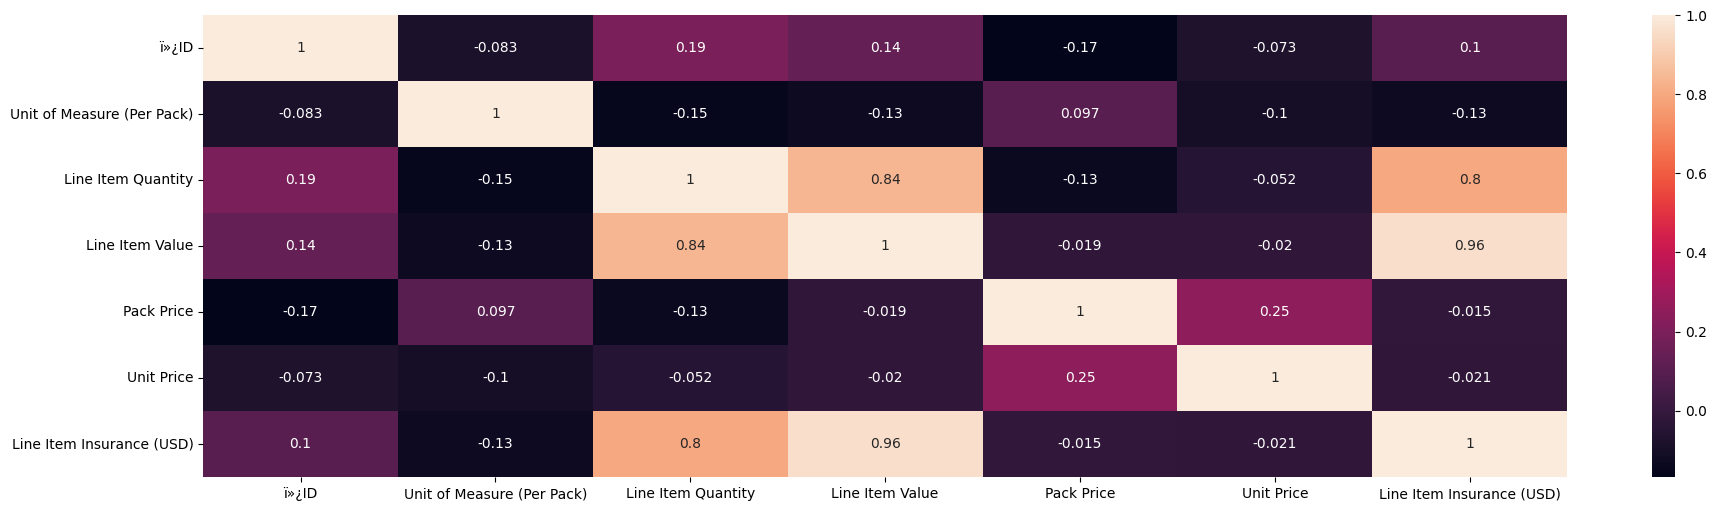

In [40]:
plt.figure(figsize=(22,6))
sns.heatmap(x.corr(),annot=True)

## Data Cleaning

In [41]:
# So here we have to focus on columns: Shipment Mode, Dosage ,Line Item Insurance (USD) 
x.isnull().sum()

ï»¿ID                              0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [42]:
# Checking th epercentage of missing values
print("Null values in Percentage")
(x.isnull().sum()/x.shape[0])*100

Null values in Percentage


ï»¿ID                            0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

In [94]:
#### # Dropping Unnecessary columns


In [44]:
x=x.drop(columns=['PQ #','PO / SO #','ASN/DN #','Managed By','Fulfill Via','Vendor INCO Term','PQ First Sent to Client Date','Product Group','Vendor','ï»¿ID'])
x.head()

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,Molecule/Test Type,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,CÃ´te d'Ivoire,Air,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,108-VN-T01,Vietnam,Air,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,Pediatric,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,100-CI-T01,CÃ´te d'Ivoire,Air,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,108-VN-T01,Vietnam,Air,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,Adult,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,108-VN-T01,Vietnam,Air,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,Adult,"Stavudine 30mg, capsules, 60 Caps",Stavudine,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


##### 1) Line Item Insaurance

<AxesSubplot: ylabel='Line Item Insurance (USD)'>

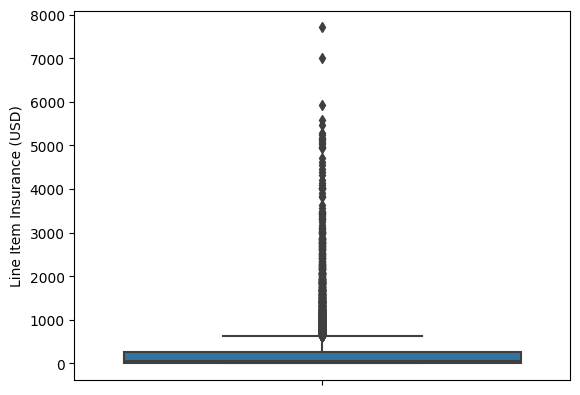

In [45]:
sns.boxplot(y=x['Line Item Insurance (USD)'])

In [46]:
x['Line Item Insurance (USD)']=x['Line Item Insurance (USD)'].fillna(x['Line Item Insurance (USD)'].median())
x['Line Item Insurance (USD)'].values[x['Line Item Insurance (USD)'].values>1000]=x['Line Item Insurance (USD)'].median()
x['Line Item Insurance (USD)'].values[x['Line Item Insurance (USD)'].values>200]=x['Line Item Insurance (USD)'].mean()

<AxesSubplot: ylabel='Line Item Insurance (USD)'>

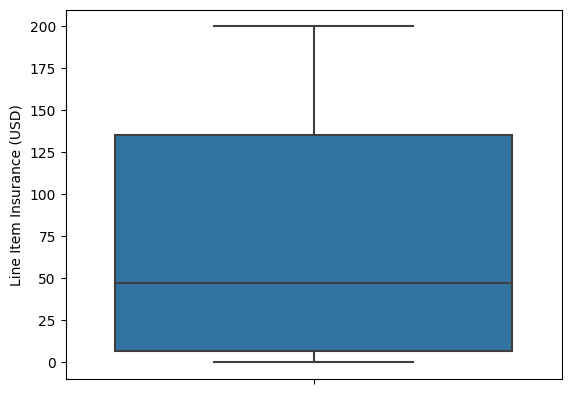

In [47]:
sns.boxplot(y=x['Line Item Insurance (USD)'])

##### Feight Cost (USD)

In [48]:
x['Freight Cost (USD)'].values

array(['780.34', '4521.5', '1653.78', ...,
       'Freight Included in Commodity Cost',
       'Freight Included in Commodity Cost',
       'Freight Included in Commodity Cost'], dtype=object)

In [49]:
x=x.loc[~x['Freight Cost (USD)'].str.contains('Freight Included in Commodity Cost')]
x=x.loc[~x['Freight Cost (USD)'].str.contains('Invoiced Separately')]
x=x.loc[~x['Freight Cost (USD)'].str.contains('See')]

In [50]:
x['Freight Cost (USD)'].values

array(['780.34', '4521.5', '1653.78', ..., '3785.72', '26180', '3410'],
      dtype=object)

In [52]:
x.shape

(6198, 23)

In [54]:
x.head(10)

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,Molecule/Test Type,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,CÃ´te d'Ivoire,Air,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,47.04
1,108-VN-T01,Vietnam,Air,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,Pediatric,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,47.04
2,100-CI-T01,CÃ´te d'Ivoire,Air,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,47.04
3,108-VN-T01,Vietnam,Air,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,Adult,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,47.04
4,108-VN-T01,Vietnam,Air,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,Adult,"Stavudine 30mg, capsules, 60 Caps",Stavudine,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,47.04
5,112-NG-T01,Nigeria,Air,Date Not Captured,28-Sep-06,28-Sep-06,28-Sep-06,Pediatric,"Zidovudine 10mg/ml, oral solution, Bottle, 240 ml",Zidovudine,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,47.04
7,109-TZ-T01,Tanzania,Air,Date Not Captured,24-Nov-06,24-Nov-06,24-Nov-06,Adult,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,47.04
11,110-ZM-T01,Zambia,Air,Date Not Captured,8-Jan-07,8-Jan-07,8-Jan-07,HIV test,"HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",...,20,2500,100000.00,40.00,2.00,"Trinity Biotech, Plc",Yes,853,13569.49,47.04
13,107-RW-T01,Rwanda,Air,12/22/06,27-Feb-07,27-Feb-07,27-Feb-07,Adult,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,...,60,10000,99800.00,9.98,0.17,"Cipla, Goa, India",Yes,7416,64179.42,47.04
14,106-HT-T01,Haiti,Air,Date Not Captured,18-Jan-07,18-Jan-07,18-Jan-07,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,750,60000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,256,1760.32,47.04


#### Shipment mode

In [55]:
x['Shipment Mode'].values

array(['Air', 'Air', 'Air', ..., 'Truck', 'Air Charter', 'Air Charter'],
      dtype=object)

In [56]:
x['Shipment Mode']=x['Shipment Mode'].fillna(x['Shipment Mode'].mode()[0])

In [57]:
x['Shipment Mode'].isnull().sum()

0

In [58]:
x['Shipment Mode']

0                Air
1                Air
2                Air
3                Air
4                Air
            ...     
10305          Truck
10306          Truck
10310          Truck
10315    Air Charter
10316    Air Charter
Name: Shipment Mode, Length: 6198, dtype: object

#### Dosage 


In [59]:
print(x['Dosage'].values)

array([nan, '10mg/ml', nan, ..., '30/50/60mg', '200/50mg', '150/300mg'],
      dtype=object)

In [60]:
print(x['Dosage'].mode())

0    300mg
Name: Dosage, dtype: object


In [61]:
print(x['Dosage'].mode())
x['Dosage']=x['Dosage'].fillna(x['Dosage'].mode()[0])

0    300mg
Name: Dosage, dtype: object


In [62]:
x['Dosage'].isnull().sum()

0

#### Weight (Kilograms)

In [63]:
x['Weight (Kilograms)'].unique()

array(['13', '358', '171', ..., '1504', '15198', '1547'], dtype=object)

In [64]:
x=x.loc[~x['Weight (Kilograms)'].str.contains('Weight Captured Separately')]


In [65]:
x=x.loc[~x['Weight (Kilograms)'].str.contains('See')]

In [66]:
x['Weight (Kilograms)']

0           13
1          358
2          171
3         1855
4         7590
         ...  
10305    39688
10306     1504
10310     2253
10315    15198
10316     1547
Name: Weight (Kilograms), Length: 6175, dtype: object

<AxesSubplot: >

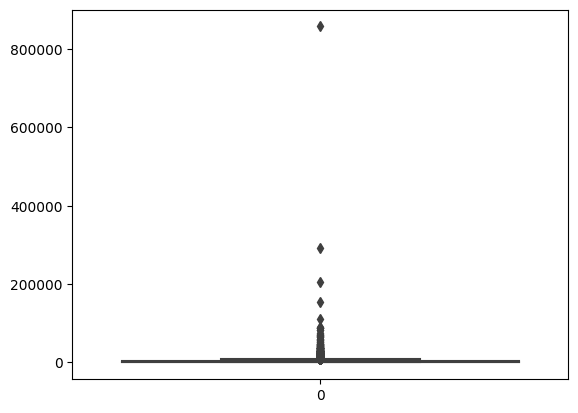

In [70]:
sns.boxplot(x['Weight (Kilograms)'])

#### PO Sent to Vendor Date

In [82]:
x['PO Sent to Vendor Date'].values


array(['Date Not Captured', 'Date Not Captured', 'Date Not Captured', ...,
       'N/A - From RDC', 'N/A - From RDC', 'N/A - From RDC'], dtype=object)

In [93]:
x['PO Sent to Vendor Date'].unique()


array(['12/22/06', '4/12/07', '5/13/07', '5/17/07', '7/4/07', '7/26/07',
       '10/3/07', '8/28/07', '11/19/07', '11/21/07', '12/10/07',
       '2/27/08', '3/3/08', '2/28/08', '3/17/08', '3/13/08', '3/18/08',
       '3/31/08', '5/14/08', '5/15/08', '5/20/08', '5/23/08', '7/1/08',
       '7/2/08', '7/3/08', '7/24/08', '7/25/08', '7/31/08', '8/27/08',
       '9/3/08', '9/24/08', '10/2/08', '12/19/08', '1/5/09', '1/16/09',
       '10/21/08', '2/5/09', '2/18/09', '3/4/09', '3/6/09', '3/25/09',
       '3/30/09', '4/2/09', '4/4/09', '4/9/09', '4/15/09', '4/29/09',
       '5/27/09', '5/18/09', '6/2/09', '4/19/06', '11/15/06', '1/9/07',
       '2/7/07', '12/14/06', '7/3/07', '11/12/07', '11/30/07', '12/3/07',
       '12/5/07', '2/4/08', '1/29/08', '2/19/08', '2/25/08', '2/29/08',
       '5/13/08', '6/12/08', '6/13/08', '8/21/08', '7/18/08', '7/28/08',
       '7/30/08', '8/22/08', '10/27/08', '11/3/08', '11/20/08',
       '12/23/08', '1/13/09', '2/3/09', '3/11/09', '3/19/09', '3/31/09',
      

In [87]:
x=x.loc[~x['PO Sent to Vendor Date'].str.contains('Date Not Captured')]
x=x.loc[~x['PO Sent to Vendor Date'].str.contains('N/A - From RDC')]

In [90]:
print(x['PO Sent to Vendor Date'])
print(x['PO Sent to Vendor Date'].unique)

13      12/22/06
18       4/12/07
19       5/13/07
20       5/17/07
22        7/4/07
          ...   
6563     6/17/10
6566     6/17/10
6570     7/12/12
6573     3/19/10
6578      2/5/13
Name: PO Sent to Vendor Date, Length: 2909, dtype: object
<bound method Series.unique of 13      12/22/06
18       4/12/07
19       5/13/07
20       5/17/07
22        7/4/07
          ...   
6563     6/17/10
6566     6/17/10
6570     7/12/12
6573     3/19/10
6578      2/5/13
Name: PO Sent to Vendor Date, Length: 2909, dtype: object>


In [91]:
x.shape

(2909, 23)

In [92]:
x.head()

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,Molecule/Test Type,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
13,107-RW-T01,Rwanda,Air,12/22/06,27-Feb-07,27-Feb-07,27-Feb-07,Adult,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,...,60,10000,99800.00,9.98,0.17,"Cipla, Goa, India",Yes,7416,64179.42,47.04
18,109-TZ-T01,Tanzania,Air,4/12/07,6-Jun-07,6-Jun-07,6-Jun-07,Pediatric,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,...,200,712,8964.08,12.59,0.06,"BMS Meymac, France",Yes,162,912.96,47.04
19,102-NG-T01,Nigeria,Air,5/13/07,19-Jun-07,19-Jun-07,19-Jun-07,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,1000,80000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341,2682.47,128.00
20,102-NG-T01,Nigeria,Air,5/17/07,19-Jun-07,19-Jun-07,19-Jun-07,HIV test,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",...,20,7500,202500.00,27.00,1.35,Chembio Diagnostics Sys. Inc.,Yes,2278,15893.71,47.04
22,108-VN-T01,Vietnam,Air,7/4/07,15-Oct-07,15-Oct-07,15-Oct-07,Pediatric,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,...,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
